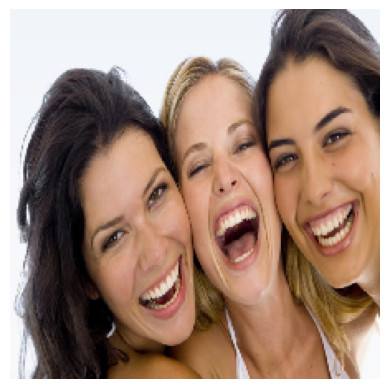

1/1 [==============================] - 1s 561ms/step
Prediction: Happy


In [4]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the pre-trained model
loaded_model = load_model('emotions_30epochs.h5')

def predict_image(file_path):
    class_labels = ['Angry', 'Happy', 'Sad']
    
    # Normalize path separators
    file_path = os.path.normpath(file_path)

    # Load and preprocess the image
    img = image.load_img(file_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Make the prediction
    prediction = loaded_model.predict(img_array)

    # Interpret the results
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class

# Prompt the user for the image path
image_path = input("Enter the path to the image: ")

# Make prediction
try:
    prediction = predict_image(image_path)
    print(f'Prediction: {prediction}')
except Exception as e:
    print(f"Error: {e}")
